## EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('movie.csv')
df

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [3]:
# no missing entries
df.isnull().sum()

text     0
label    0
dtype: int64

In [4]:
# labels only have 1s and 0s
df['label'].unique()

array([0, 1], dtype=int64)

In [5]:
df.duplicated().sum()

277

In [6]:
#these are all the duplicate entries, so we'll remove the duplicates and keep just one
df[df.duplicated()]

,text,label
2164,"I find it rather useless to comment on this ""m...",0
3236,An absolutely atrocious adaptation of the wond...,0
3428,When I first saw this film it was not an impre...,0
3652,Before I watched this tv movie I did not know ...,1
3787,What a clunker!<br /><br />It MUST have been m...,0
...,...,...
39229,I Enjoyed Watching This Well Acted Movie Very ...,1
39246,You do realize that you've been watching the E...,0
39508,(Spoilers)<br /><br />Oh sure it's based on Mo...,0
39681,It's been a long time since I last saw a movie...,0


In [7]:
df.drop_duplicates(inplace = True)
df.reset_index(inplace = True)
df

,index,text,label
0,0,I grew up (b. 1965) watching and loving the Th...,0
1,1,"When I put this movie in my DVD player, and sa...",0
2,2,Why do people who do not know what a particula...,0
3,3,Even though I have great interest in Biblical ...,0
4,4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...,...
39718,39995,"""Western Union"" is something of a forgotten cl...",1
39719,39996,This movie is an incredible piece of work. It ...,1
39720,39997,My wife and I watched this movie because we pl...,0
39721,39998,"When I first watched Flatliners, I was amazed....",1


In [8]:
df.drop('index', axis = 1, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39723 entries, 0 to 39722
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    39723 non-null  object
 1   label   39723 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 620.8+ KB


In [10]:
#since no. of 1s and 0s are almost equal, this is a balanced dataset
df['label'].value_counts()

label
1    19908
0    19815
Name: count, dtype: int64

In [11]:
df['Review length'] = df['text'].apply(len)
df

,text,label,Review length
0,I grew up (b. 1965) watching and loving the Th...,0,874
1,"When I put this movie in my DVD player, and sa...",0,1811
2,Why do people who do not know what a particula...,0,983
3,Even though I have great interest in Biblical ...,0,351
4,Im a die hard Dads Army fan and nothing will e...,1,983
...,...,...,...
39718,"""Western Union"" is something of a forgotten cl...",1,3111
39719,This movie is an incredible piece of work. It ...,1,291
39720,My wife and I watched this movie because we pl...,0,1092
39721,"When I first watched Flatliners, I was amazed....",1,1045


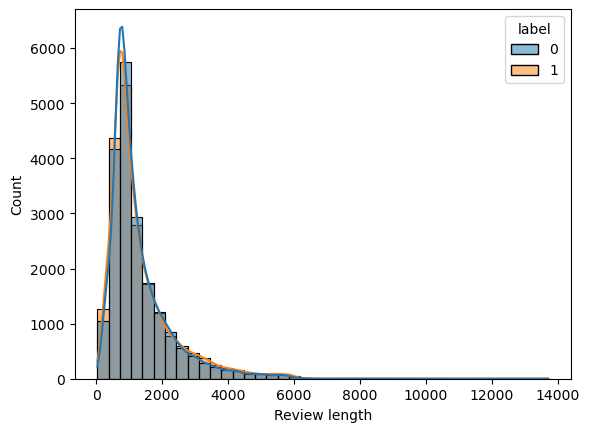

In [12]:
sns.histplot(df, x = 'Review length', hue = 'label', bins = 40, kde = True)
plt.show()

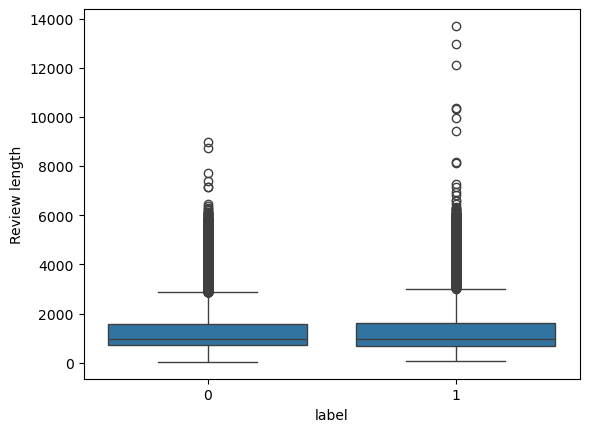

In [13]:
sns.boxplot(x='label', y='Review length', data=df)
plt.show()

The distribution of positive and negative reviews wrt `Review length` is almost the same. Thus it is not a good feature to classify the sentiment, so we'll drop it.

In [14]:
df.drop('Review length', axis = 1, inplace= True)

In [15]:
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


## Data preprocessing

In [16]:
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet, stopwords
import re

In [17]:
lemma = WordNetLemmatizer()
def pos_tags(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def remove_special_char(string):
    string = re.sub(r'[^A-Za-z\s]', '', string)
    return string

stop_words = set(stopwords.words('english'))
def remove_sw (string):
    string = [word for word in string if word not in stop_words]
    return string

In [18]:
def preprocess(string):
    string = string.lower()
    string = word_tokenize(string)
    tags = pos_tag(string)
    string = [lemma.lemmatize(word, pos_tags(pos)) for word, pos in tags]
    string = [remove_special_char(token) for token in string if remove_special_char(token)]
    string = remove_sw(string)
    return string

In [19]:
import time
start_time = time.time()
df['tokenized text'] = df['text'].apply(preprocess)
end_time = time.time()
print(f"Time taken: {end_time - start_time:.2f} seconds")

Time taken: 350.00 seconds


In [20]:
df

,text,label,tokenized text
0,I grew up (b. 1965) watching and loving the Th...,0,"[grow, b, watching, love, thunderbird, mate, s..."
1,"When I put this movie in my DVD player, and sa...",0,"[put, movie, dvd, player, sit, coke, chip, exp..."
2,Why do people who do not know what a particula...,0,"[people, know, particular, time, past, like, f..."
3,Even though I have great interest in Biblical ...,0,"[even, though, great, interest, biblical, movi..."
4,Im a die hard Dads Army fan and nothing will e...,1,"[im, die, hard, dad, army, fan, nothing, ever,..."
...,...,...,...
39718,"""Western Union"" is something of a forgotten cl...",1,"[western, union, something, forgotten, classic..."
39719,This movie is an incredible piece of work. It ...,1,"[movie, incredible, piece, work, explore, ever..."
39720,My wife and I watched this movie because we pl...,0,"[wife, watch, movie, plan, visit, sicily, stro..."
39721,"When I first watched Flatliners, I was amazed....",1,"[first, watch, flatliners, amaze, necessary, f..."


In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['tokenized text'], df['label'], test_size=0.2, random_state=42)

In [22]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from tensorflow import keras
from tensorflow.keras import layers

In [24]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix

## Vectorization, model selection and evaluation

### Using one hot encoding

In [25]:
from collections import Counter
from tensorflow.keras.preprocessing.text import Tokenizer
from scipy.sparse import csr_matrix

def one_hot_encoded (df, num_words = 4000):
    token_list = [token for tokens in df for token in tokens]
    freq = Counter(token_list)
    most_common_tokens = set(word for word, _ in freq.most_common(num_words))
    filtered_tokens = df.apply(lambda tokens: [w for w in tokens if w in most_common_tokens])
    texts_joined = filtered_tokens.apply(lambda tokens: ' '.join(tokens))
    tokenizer = Tokenizer(num_words=num_words, oov_token="<OOV>")
    tokenizer.fit_on_texts(texts_joined)
    sequences = tokenizer.texts_to_sequences(texts_joined)

    rows, cols, data = [], [], []
    for i, seq in enumerate(sequences):
        for idx in seq:
            rows.append(i)
            cols.append(idx)
            data.append(1)
    X_sparse = csr_matrix((data, (rows, cols)), shape=(len(sequences), num_words), dtype=np.uint8)
    
    return X_sparse, tokenizer

In [26]:
x_train_ohe, tokenizer = one_hot_encoded(x_train)
texts_test = x_test.apply(lambda tokens: ' '.join(tokens))
sequences_test = tokenizer.texts_to_sequences(texts_test)

rows, cols, data = [], [], []
for i, seq in enumerate(sequences_test):
    for idx in seq:
        rows.append(i)
        cols.append(idx)
        data.append(1)
x_test_ohe = csr_matrix((data, (rows, cols)), shape=(len(sequences_test), 4000), dtype=np.uint8)

In [27]:
def perfomance(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    rocauc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Model Performance Metrics:\n")
    print(f"Accuracy       : {accuracy:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"ROC AUC Score  : {rocauc:.4f}")
    print("Confusion Matrix:",)
    print(cm)

#### Logistic Regression

In [32]:
lr = LogisticRegression(max_iter = 10000)
lr.fit(x_train_ohe, y_train)
y_pred_lr = lr.predict(x_test_ohe)

In [33]:
perfomance(y_test, y_pred_lr)

Model Performance Metrics:

Accuracy       : 0.6014
F1 Score       : 0.3406
ROC AUC Score  : 0.5996
Confusion Matrix:
[[3960   31]
 [3136  818]]


#### Bernoulli Naive Bayes Classifier

In [34]:
bnb = BernoulliNB()
bnb.fit(x_train_ohe, y_train)
y_pred_nb  = bnb.predict(x_test_ohe)

In [35]:
perfomance(y_test, y_pred_nb)

Model Performance Metrics:

Accuracy       : 0.8447
F1 Score       : 0.8421
ROC AUC Score  : 0.8446
Confusion Matrix:
[[3420  571]
 [ 663 3291]]


#### SVM (Support Vector Machine)

In [36]:
svm = LinearSVC()
svm.fit(x_train_ohe, y_train)
y_pred_svm  = svm.predict(x_test_ohe)

In [37]:
perfomance(y_test, y_pred_svm)

Model Performance Metrics:

Accuracy       : 0.5775
F1 Score       : 0.2685
ROC AUC Score  : 0.5755
Confusion Matrix:
[[3972   19]
 [3338  616]]


#### Random Forests

In [38]:
rf = RandomForestClassifier()
rf.fit(x_train_ohe, y_train)
y_pred_rf  = rf.predict(x_test_ohe)

In [39]:
perfomance(y_test, y_pred_rf)

Model Performance Metrics:

Accuracy       : 0.8376
F1 Score       : 0.8352
ROC AUC Score  : 0.8376
Confusion Matrix:
[[3386  605]
 [ 685 3269]]


#### A simple Neural network with a few dense layers

In [40]:
x_train_dense = x_train_ohe.toarray()
x_test_dense = x_test_ohe.toarray()

In [41]:
model = keras.Sequential([
    layers.Input(shape=(4000,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       512,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 520,449 (1.99 MB)

 Trainable params: 520,449 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.fit(x_train_dense, y_train, epochs=20, batch_size=200, validation_split=0.2)

Epoch 1/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9949 - loss: 0.0148 - val_accuracy: 0.8663 - val_loss: 0.7950
Epoch 2/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9966 - loss: 0.0143 - val_accuracy: 0.8658 - val_loss: 0.7946
Epoch 3/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9960 - loss: 0.0124 - val_accuracy: 0.8671 - val_loss: 0.7813
Epoch 4/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9969 - loss: 0.0099 - val_accuracy: 0.8647 - val_loss: 0.8561
Epoch 5/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9969 - loss: 0.0104 - val_accuracy: 0.8636 - val_loss: 0.8415
Epoch 6/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9967 - loss: 0.0103 - val_accuracy: 0.8652 - val_loss: 0.8956
Epoch 7/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9969 - loss: 0.0090 - val_accuracy: 0.8645 - val_loss: 0.8796
Epoch 8/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9970 - loss: 0.0085 - val_accuracy: 0.

In [45]:
y_pred_nn = (model.predict(x_test_dense) >= 0.3).astype(int).flatten()
perfomance(y_test, y_pred_nn)

249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step
Model Performance Metrics:

Accuracy       : 0.7206
F1 Score       : 0.6250
ROC AUC Score  : 0.7194
Confusion Matrix:
[[3875  116]
 [2104 1850]]


### Using BoW (Count Vectorizer)

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
x_train_joined = x_train.apply(lambda tokens: ' '.join(tokens))
x_test_joined = x_test.apply(lambda tokens: ' '.join(tokens))
vectorizer = CountVectorizer(max_features=10000)
x_train_cv = vectorizer.fit_transform(x_train_joined)
x_test_cv = vectorizer.transform(x_test_joined)

#### Logistic Regression

In [47]:
lr1 = LogisticRegression(max_iter = 10000)
lr1.fit(x_train_cv, y_train)
y_pred_lr1 = lr1.predict(x_test_cv)

In [48]:
perfomance(y_test, y_pred_lr1)

Model Performance Metrics:

Accuracy       : 0.8646
F1 Score       : 0.8645
ROC AUC Score  : 0.8646
Confusion Matrix:
[[3437  554]
 [ 522 3432]]


#### Bernoulli Naive Bayes Classifier

In [49]:
bnb1 = BernoulliNB()
bnb1.fit(x_train_cv, y_train)
y_pred_nb1  = bnb1.predict(x_test_cv)

In [53]:
perfomance(y_test, y_pred_nb1)

Model Performance Metrics:

Accuracy       : 0.8456
F1 Score       : 0.8431
ROC AUC Score  : 0.8455
Confusion Matrix:
[[3422  569]
 [ 658 3296]]


#### SVM (Support Vector Machine)

In [52]:
svm1 = LinearSVC()
svm1.fit(x_train_cv, y_train)
y_pred_svm1  = svm1.predict(x_test_cv)

In [54]:
perfomance(y_test, y_pred_svm1)

Model Performance Metrics:

Accuracy       : 0.8404
F1 Score       : 0.8398
ROC AUC Score  : 0.8404
Confusion Matrix:
[[3353  638]
 [ 630 3324]]


#### Random Forests

In [57]:
rf1 = RandomForestClassifier()
rf1.fit(x_train_cv, y_train)
y_pred_rf1  = rf1.predict(x_test_cv)

In [58]:
perfomance(y_test, y_pred_rf1)

Model Performance Metrics:

Accuracy       : 0.8448
F1 Score       : 0.8433
ROC AUC Score  : 0.8448
Confusion Matrix:
[[3394  597]
 [ 636 3318]]


#### A simple Neural network with a few dense layers

In [59]:
x_train_dense1 = x_train_cv.toarray()
x_test_dense1 = x_test_cv.toarray()

In [60]:
model1 = keras.Sequential([
    layers.Input(shape=(10000,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid')
])

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,288,449 (4.92 MB)

 Trainable params: 1,288,449 (4.92 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model1.fit(x_train_dense1, y_train, epochs=20, batch_size=200, validation_split=0.2)

Epoch 1/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 0.7649 - loss: 0.4912 - val_accuracy: 0.8862 - val_loss: 0.2831
Epoch 2/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9219 - loss: 0.2145 - val_accuracy: 0.8837 - val_loss: 0.2847
Epoch 3/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9529 - loss: 0.1309 - val_accuracy: 0.8834 - val_loss: 0.3338
Epoch 4/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9760 - loss: 0.0772 - val_accuracy: 0.8807 - val_loss: 0.3920
Epoch 5/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9872 - loss: 0.0427 - val_accuracy: 0.8765 - val_loss: 0.4960
Epoch 6/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9906 - loss: 0.0319 - val_accuracy: 0.8770 - val_loss: 0.5502
Epoch 7/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9947 - loss: 0.0207 - val_accuracy: 0.8737 - val_loss: 0.5418
Epoch 8/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9937 - loss: 0.0203 - val_accu

In [62]:
y_pred_nn1 = (model1.predict(x_test_dense1) >= 0.5).astype(int).flatten()
perfomance(y_test, y_pred_nn1)

249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Model Performance Metrics:

Accuracy       : 0.8733
F1 Score       : 0.8729
ROC AUC Score  : 0.8733
Confusion Matrix:
[[3479  512]
 [ 495 3459]]


### Using BoW (TF-IDF Vectorizer)

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer1 = TfidfVectorizer(max_features=10000)
x_train_tfidf = vectorizer1.fit_transform(x_train_joined)
x_test_tfidf = vectorizer1.transform(x_test_joined)

#### Logistic Regression

In [64]:
lr2 = LogisticRegression(max_iter = 10000)
lr2.fit(x_train_tfidf, y_train)
y_pred_lr2 = lr2.predict(x_test_tfidf)

In [65]:
perfomance(y_test, y_pred_lr2)

Model Performance Metrics:

Accuracy       : 0.8850
F1 Score       : 0.8859
ROC AUC Score  : 0.8850
Confusion Matrix:
[[3481  510]
 [ 404 3550]]


#### Bernoulli Naive Bayes Classifier

In [66]:
bnb2 = BernoulliNB()
bnb2.fit(x_train_tfidf, y_train)
y_pred_nb2  = bnb2.predict(x_test_tfidf)

In [67]:
perfomance(y_test, y_pred_nb2)

Model Performance Metrics:

Accuracy       : 0.8456
F1 Score       : 0.8431
ROC AUC Score  : 0.8455
Confusion Matrix:
[[3422  569]
 [ 658 3296]]


#### SVM (Support Vector Machine)

In [68]:
svm2 = LinearSVC()
svm2.fit(x_train_tfidf, y_train)
y_pred_svm2  = svm2.predict(x_test_tfidf)

In [69]:
perfomance(y_test, y_pred_svm2)

Model Performance Metrics:

Accuracy       : 0.8813
F1 Score       : 0.8819
ROC AUC Score  : 0.8814
Confusion Matrix:
[[3482  509]
 [ 434 3520]]


#### Random Forests

In [70]:
rf2 = RandomForestClassifier()
rf2.fit(x_train_tfidf, y_train)
y_pred_rf2  = rf2.predict(x_test_tfidf)

In [71]:
perfomance(y_test, y_pred_rf2)

Model Performance Metrics:

Accuracy       : 0.8437
F1 Score       : 0.8409
ROC AUC Score  : 0.8436
Confusion Matrix:
[[3421  570]
 [ 672 3282]]


#### A simple Neural network with a few dense layers

In [72]:
x_train_dense2 = x_train_tfidf.toarray()
x_test_dense2 = x_test_tfidf.toarray()

In [73]:
model2 = keras.Sequential([
    layers.Input(shape=(10000,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid')
])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,288,449 (4.92 MB)

 Trainable params: 1,288,449 (4.92 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
model2.fit(x_train_dense2, y_train, epochs=20, batch_size=200, validation_split=0.2)

Epoch 1/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.7373 - loss: 0.5607 - val_accuracy: 0.8878 - val_loss: 0.2694
Epoch 2/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9250 - loss: 0.2003 - val_accuracy: 0.8872 - val_loss: 0.2733
Epoch 3/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9530 - loss: 0.1404 - val_accuracy: 0.8789 - val_loss: 0.3016
Epoch 4/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9696 - loss: 0.1003 - val_accuracy: 0.8738 - val_loss: 0.3554
Epoch 5/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.9827 - loss: 0.0642 - val_accuracy: 0.8737 - val_loss: 0.4106
Epoch 6/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9916 - loss: 0.0359 - val_accuracy: 0.8729 - val_loss: 0.4654
Epoch 7/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9947 - loss: 0.0227 - val_accuracy: 0.8688 - val_loss: 0.5371
Epoch 8/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9975 - loss: 0.0134 - val_accu

In [75]:
y_pred_nn2 = (model1.predict(x_test_dense2) >= 0.5).astype(int).flatten()
perfomance(y_test, y_pred_nn2)

249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Model Performance Metrics:

Accuracy       : 0.8608
F1 Score       : 0.8590
ROC AUC Score  : 0.8608
Confusion Matrix:
[[3469  522]
 [ 584 3370]]


### Using Word2Vec

In [76]:
w2v = Word2Vec(sentences=x_train, vector_size=200, window=5, min_count=3, workers=4, epochs = 10)

In [77]:
def review_vector(tokens, model, vector_size=200):
    vec = np.zeros(vector_size)
    count = 0
    for word in tokens:
        if word in model.wv:
            vec += model.wv[word]
            count += 1
    if count != 0:
        vec /= count
    return vec

In [78]:
x_train_w2v = np.array([review_vector(tokens, w2v) for tokens in x_train])
x_test_w2v = np.array([review_vector(tokens, w2v) for tokens in x_test])

#### Logistic Regression

In [79]:
lr3 = LogisticRegression(max_iter = 100000)
lr3.fit(x_train_w2v, y_train)
y_pred_lr3 = lr3.predict(x_test_w2v)

In [80]:
perfomance(y_test, y_pred_lr3)

Model Performance Metrics:

Accuracy       : 0.8714
F1 Score       : 0.8709
ROC AUC Score  : 0.8714
Confusion Matrix:
[[3477  514]
 [ 508 3446]]


#### Bernoulli Naive Bayes Classifier

In [81]:
bnb3 = BernoulliNB()
bnb3.fit(x_train_w2v, y_train)
y_pred_nb3 = bnb3.predict(x_test_w2v)

In [82]:
perfomance(y_test, y_pred_nb3)

Model Performance Metrics:

Accuracy       : 0.7597
F1 Score       : 0.7488
ROC AUC Score  : 0.7595
Confusion Matrix:
[[3191  800]
 [1109 2845]]


#### SVM (Support Vector Machine)

In [83]:
svm3 = LinearSVC()
svm3.fit(x_train_w2v, y_train)
y_pred_svm3  = svm3.predict(x_test_w2v)

In [84]:
perfomance(y_test, y_pred_svm3)

Model Performance Metrics:

Accuracy       : 0.8717
F1 Score       : 0.8715
ROC AUC Score  : 0.8718
Confusion Matrix:
[[3469  522]
 [ 497 3457]]


#### Random Forests

In [85]:
rf3 = RandomForestClassifier()
rf3.fit(x_train_w2v, y_train)
y_pred_rf3  = rf3.predict(x_test_w2v)

In [86]:
perfomance(y_test, y_pred_rf3)

Model Performance Metrics:

Accuracy       : 0.8370
F1 Score       : 0.8387
ROC AUC Score  : 0.8371
Confusion Matrix:
[[3283  708]
 [ 587 3367]]


#### A simple Neural network with a few dense layers

In [134]:
model3 = keras.Sequential([
    layers.Input(shape=(200,)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid')
])

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_53 (Dense)                │ (None, 256)            │        51,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,673 (362.00 KB)

 Trainable params: 92,673 (362.00 KB)

 Non-trainable params: 0 (0.00 B)

In [135]:
model3.fit(x_train_w2v, y_train, epochs=20, batch_size=200, validation_split=0.2)

Epoch 1/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6717 - loss: 0.5784 - val_accuracy: 0.8669 - val_loss: 0.3139
Epoch 2/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8648 - loss: 0.3302 - val_accuracy: 0.8759 - val_loss: 0.2968
Epoch 3/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8678 - loss: 0.3173 - val_accuracy: 0.8763 - val_loss: 0.2945
Epoch 4/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8695 - loss: 0.3129 - val_accuracy: 0.8774 - val_loss: 0.2918
Epoch 5/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8775 - loss: 0.3007 - val_accuracy: 0.8718 - val_loss: 0.3019
Epoch 6/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8777 - loss: 0.3039 - val_accuracy: 0.8792 - val_loss: 0.2910
Epoch 7/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8808 - loss: 0.2929 - val_accuracy: 0.8814 - val_loss: 0.2877
Epoch 8/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8797 - loss: 0.2934 - val_accura

In [136]:
y_pred_nn3 = (model3.predict(x_test_w2v) >= 0.5).astype(int).flatten()
perfomance(y_test, y_pred_nn3)

249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Model Performance Metrics:

Accuracy       : 0.8710
F1 Score       : 0.8776
ROC AUC Score  : 0.8713
Confusion Matrix:
[[3244  747]
 [ 278 3676]]


# END